<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/MIDTERM_corretto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## correzzione del MIDTERM

In [1]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize


pl.rcParams['font.size'] = 18

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/MLPNS/

/content/drive/MyDrive/MLPNS


In [4]:
data = pd.read_excel('country_pop.xls')

In [5]:
data.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2021-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN


In [6]:
data.tail()


,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
262,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN
263,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,6097035.0,6193384.0,6290365.0,6390574.0,6500816.0,6629999.0,6784695.0,6967941.0,7178675.0,7414158.0,7669694.0,7941898.0,8231910.0,8541605.0,8869370.0,9213084.0,9572175.0,9941109.0,10322043.0,10730862.0,11189177.0,11709993.0,12302124.0,12954155.0,13634076.0,14297613.0,14913315.0,15469274.0,15975668.0,16450310.0,16921149.0,17409072.0,17918373.0,18443691.0,18985000.0,19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN
264,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,20942145.0,21496075.0,22069776.0,22665271.0,23281508.0,23913099.0,24552540.0,25195187.0,25836888.0,26480913.0,27138965.0,27827320.0,28556769.0,29333103.0,30150448.0,30993758.0,31841593.0,32678874.0,33495953.0,34297727.0,35100909.0,35930050.0,36800509.0,37718950.0,38672607.0,39633750.0,40564059.0,41435758.0,42241011.0,42987461.0,43682260.0,44338543.0,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN
265,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,3918872.0,4045740.0,4179067.0,4319224.0,4466174.0,4619546.0,4778724.0,4943283.0,5112823.0,5287548.0,5468262.0,5656139.0,5851825.0,6055366.0,6265864.0,6481916.0,6701540.0,6923149.0,7146969.0,7372837.0,7598275.0,7820205.0,8036845.0,8246656.0,8451347.0,8656486.0,8869740.0,9096607.0,9339733.0,9597609.0,9866476.0,10140561.0,10415944.0,10692193.0,10971698.0,11256743.0,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN
266,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3776681.0,3905034.0,4039201.0,4178726.0,4322861.0,4471177.0,4623351.0,4779827.0,4941906.0,5111337.0,5289303.0,5476982.0,5673911.0,5877726.0,6085074.0,6293875.0,6502569.0,6712827.0,6929664.0,7160023.0,7408624.0,7675591.0,7958241.0,8254747.0,8562249.0,8877489.0,9200149.0,9527203.0,9849125.0,10153852.0,10432421.0,10680995.0,10900502.0,11092766.0,11261744.0,11410714.0,11541217.0,11653242.0,11747072.0,11822719.0,11881477.0,11923914.0,

In [7]:
data.describe()

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.630000e+02,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,1.0
mean,1.175191e+08,1.190992e+08,1.212107e+08,1.238384e+08,1.264867e+08,1.292005e+08,1.320576e+08,1.349040e+08,1.378033e+08,1.408464e+08,1.439331e+08,1.470993e+08,1.502270e+08,1.533344e+08,1.564518e+08,1.595092e+08,1.625183e+08,1.655174e+08,1.685684e+08,1.716933e+08,1.748562e+08,1.781039e+08,1.814852e+08,1.849064e+08,1.883250e+08,1.918105e+08,1.954005e+08,1.990853e+08,2.028106e+08,2.065313e+08,2.087305e+08,2.123850e+08,2.167562e+08,2.203238e+08,2.238601e+08,2.265307e+08,2.300010e+08,2.334634e+08,2.359940e+08,2.393634e+08,2.427078e+08,2.460376e+08,2.493649e+08,2.527043e+08,2.560642e+08,2.594473e+08,2.628546e+08,2.662821e+08,2.697574e+08,2.732537e+08,2.767561e+08,2.802448e+08,2.848719e+08,2.884961e+08,2.921540e+08,2.958260e+08,2.995286e+08,3.032282e+08,3.068637e+08,3.104563e+08,2020.0
std,3.721212e+08,3.765807e+08,3.831402e+08,3.916925e+08,4.002876e+08,4.091189e+08,4.185139e+08,4.278394e+08,4.373797e+08,4.474110e+08,4.576385e+08,4.681251e+08,4.784300e+08,4.886521e+08,4.988282e+08,5.087217e+08,5.184102e+08,5.279959e+08,5.377335e+08,5.477072e+08,5.577953e+08,5.681836e+08,5.790915e+08,5.901404e+08,6.011454e+08,6.123659e+08,6.239384e+08,6.358402e+08,6.478510e+08,6.597826e+08,6.694166e+08,6.810378e+08,6.934917e+08,7.046871e+08,7.157947e+08,7.256002e+08,7.365307e+08,7.474382e+08,7.569194e+08,7.674802e+08,7.778949e+08,7.881981e+08,7.984209e+08,8.086172e+08,8.188268e+08,8.290807e+08,8.393602e+08,8.496517e+08,8.600540e+08,8.705283e+08,8.810195e+08,8.915414e+08,9.037544e+08,9.145588e+08,9.254409e+08,9.363494e+08,9.473410e+08,9.583331e+08,9.690646e+08,9.795887e+08,NaN
min,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,1.966000e+03,1.967000e+03,1.968000e+03,1.969000e+03,1.970000e+03,1.971000e+03,1.972000e+03,1.973000e+03,1.974000e+03,1.975000e+03,1.976000e+03,1.977000e+03,1.978000e+03,1.979000e+03,1.980000e+03,1.981000e+03,1.982000e+03,1.983000e+03,1.984000e+03,1.985000e+03,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,1.990000e+03,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,1.995000e+03,1.996000e+03,1.997000e+03,1.998000e+03,1.999000e+03,2.000000e+03,2.001000e+03,2.002000e+03,2.003000e+03,2.004000e+03,2.005000e+03,2.006000e+03,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2020.0
25%,5.009280e+05,5.057990e+05,5.112870e+05,5.175800e+05,5.248950e+05,5.333610e+05,5.431120e+05,5.771640e+05,5.96

dando un'occhiata hai dati si può notare:

-le prime due righe (0,1) non ci interessano

-delle colonne terremo quella identificata come Data Source e quelle relative hai dati per ogni anno, eliminando l'ultima che contiene solo NaN

In [8]:
# DATA CLEANING
#gli dico di leggere solo la prima colonna (0) e dalla 4 in poi
#salta la riga 1 e 2 e usa come indice 'daa source'
data1 = pd.read_excel('country_pop.xls', usecols=[0]+list(range(4,70)),
                      skiprows=[1,2]).set_index('Data Source')
data1.head()


,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN


In [9]:
data1.columns = data1.iloc[0] # imposto il nome delle colonne uguale alla prima riga di dati
data1.head()

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN


In [10]:
data1.shape

(265, 61)

In [11]:
#ora rimuovo la prima riga... non mi serve più
data1.drop('Country Name', inplace=True)#modifica il dataframe, lo sovrascrive
# alternativa data1 = data1.drop..

print("missing values after cleaning", (data1.isna().sum()>0).sum())


missing values after cleaning 61


In [12]:
data1.head()

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [13]:
data1.tail()

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN
"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,6097035.0,6193384.0,6290365.0,6390574.0,6500816.0,6629999.0,6784695.0,6967941.0,7178675.0,7414158.0,7669694.0,7941898.0,8231910.0,8541605.0,8869370.0,9213084.0,9572175.0,9941109.0,10322043.0,10730862.0,11189177.0,11709993.0,12302124.0,12954155.0,13634076.0,14297613.0,14913315.0,15469274.0,15975668.0,16450310.0,16921149.0,17409072.0,17918373.0,18443691.0,18985000.0,19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN
South Africa,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,20942145.0,21496075.0,22069776.0,22665271.0,23281508.0,23913099.0,24552540.0,25195187.0,25836888.0,26480913.0,27138965.0,27827320.0,28556769.0,29333103.0,30150448.0,30993758.0,31841593.0,32678874.0,33495953.0,34297727.0,35100909.0,35930050.0,36800509.0,37718950.0,38672607.0,39633750.0,40564059.0,41435758.0,42241011.0,42987461.0,43682260.0,44338543.0,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN
Zambia,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,3918872.0,4045740.0,4179067.0,4319224.0,4466174.0,4619546.0,4778724.0,4943283.0,5112823.0,5287548.0,5468262.0,5656139.0,5851825.0,6055366.0,6265864.0,6481916.0,6701540.0,6923149.0,7146969.0,7372837.0,7598275.0,7820205.0,8036845.0,8246656.0,8451347.0,8656486.0,8869740.0,9096607.0,9339733.0,9597609.0,9866476.0,10140561.0,10415944.0,10692193.0,10971698.0,11256743.0,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN
Zimbabwe,3776681.0,3905034.0,4039201.0,4178726.0,4322861.0,4471177.0,4623351.0,4779827.0,4941906.0,5111337.0,5289303.0,5476982.0,5673911.0,5877726.0,6085074.0,6293875.0,6502569.0,6712827.0,6929664.0,7160023.0,7408624.0,7675591.0,7958241.0,8254747.0,8562249.0,8877489.0,9200149.0,9527203.0,9849125.0,10153852.0,10432421.0,10680995.0,10900502.0,11092766.0,11261744.0,11410714.0,11541217.0,11653242.0,11747072.0,11822719.0,11881477.0,11923914.0,11954290.0,11982224.0,12019912.0,12076699.0,12155491.0,12255922.0,12379549.0,12526968.0,12697723.0,12894316.0,13115131.0,13350356.0,13586681.0,13814629.0,14030390.0,14236745.0,14439018.0,14645468.0,NaN


In [14]:
data1.shape

(264, 61)

In [15]:
#rimuovioamo l'ultima colonna
data1 = data1.dropna(axis=1, how='all') # asse1=colonne: rimuove tutte le colonne i cui valori siano NaN
data1 = data1.dropna(axis=0)
data1.head()

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [16]:
data1.shape

(258, 60)

## visualizzazione dei dati

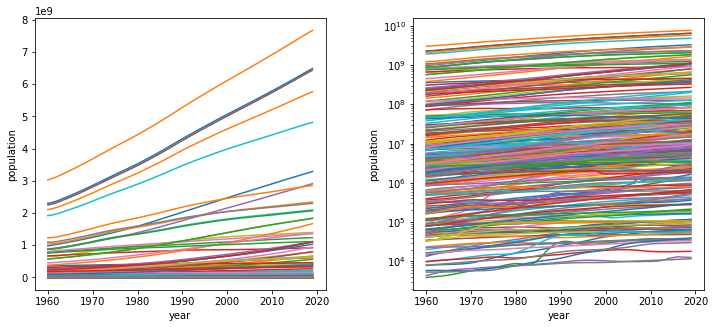

In [17]:
fig, axs = pl.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.subplots_adjust(wspace=0.3)
ax1 = data1.T.plot(legend=False, ax=axs[0]);
ax1.set_xlabel("year")
ax1.set_ylabel("population");
ax2 = data1.T.plot(legend=False, ax=axs[1], logy=True);
ax2.set_xlabel("year")
ax2.set_ylabel("population");

il primo grafico ci fa capire come ci siano dati differenti per vari ordini di grandezza allora un grafico in scala semilogartmica è cosa buona e giusta: ricordarsi la caption

In [18]:
data1.shape

(258, 60)

## DATA ANALYSIS

Of course different countries have different population size. But we are only interested in the trends in these exercises, not in the overal size of the country. Thus before fitting a polynomial to the data you need to normalize the lightcurves: from each lightcurve you should remove the mean and divide by the standard deviation. You can do it by hand or you can use the preprocessing.scale function

In [19]:
#ogni time series deve avere media zero e varianza nulla
data2 = preprocessing.scale(data1, axis=1)
data2.shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


(258, 60)

In [20]:
print( "standard deviations", data2.std(axis=1))

standard deviations [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


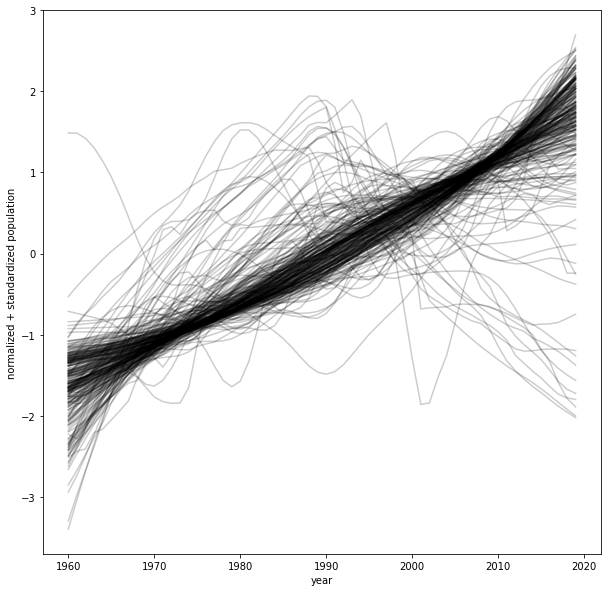

In [21]:
pl.figure(figsize=(10,10))
pl.plot(data2.T, c='k', alpha=0.2); #stiamo lavotrando con un array .T ne fa il trasposto
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");

la gran parte delle curve normalizzate sembra avere una crescita abbstanza costante con alcune eccezzioni

## MODELLING

fit a second degree polynomial (y = ax^2 + bx + c) to each time series. Store the values of a,b,c for each time series in an array called features (I recommand using L2 for the fit and scipy.optimize.minimize)

plot the histogram of each feature

Optional: also store the value of L2 for the best fit parameters. Then your feature space would be 4-dimensional

In [22]:
# create a mute index for the exogenous variable
#non ci interessa che sia in funzione delgi anni, ci interessa il trend
xx = np.arange(data2.shape[1])
xx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [23]:
#definiamo la target function
def l2(theta, y):
  '''L2 target function
  input: 
    theta: parameter's array containing 3 entries
    y: target values array
  '''
  a, b, c = theta
  return sum((y - poly2(a, b, c))**2)
def poly2(a, b, c):
  '''second degree polynomial 
  input: 
    a: second degree coefficient
    b: first de
    gree coefficient
    c: intercept
  '''
  return a*xx**2 + b*xx + c


In [24]:
features = [] #raccolco i parametri ottenuti per ogni stato
# looping over each country
for y in data2:
  # since the time series are normalized I expect the intercept 
  # and the coefficients to be small
  ig = (1, 1, 0)   # initial guess
  fit = scipy.optimize.minimize(l2, ig, args=y)
  #if I want to include goodness of fit as a feature
  features.append([*fit.x, fit.fun])
#fit.x restituisce i valori ottenuti e anche il goodness of fit,
# * serve per dare i 3 elementi in modo separato,
#fit.fun è il goodness of fit
features = np.array(features)

In [25]:
features.shape 

(258, 4)

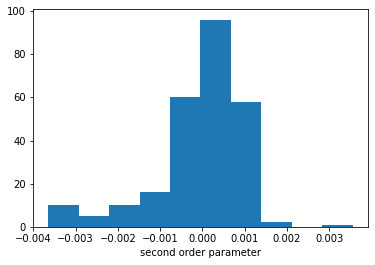

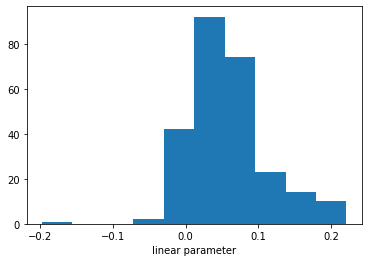

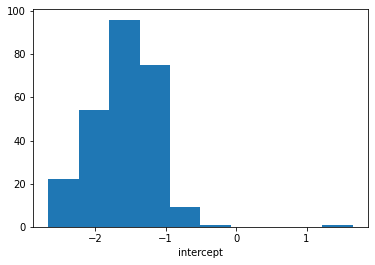

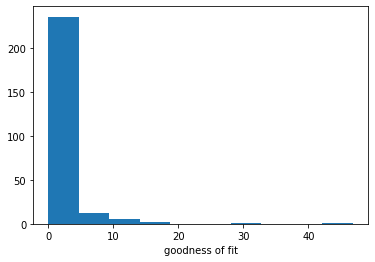

In [26]:
labels = ["second order parameter",
          "linear parameter",
          "intercept",
          "goodness of fit"]
for i in range(features.shape[1]):
  pl.figure()
  pl.hist(features[:,i])
  pl.xlabel(labels[i])

before you can use kmeans clusgtering you have to preprocess (scale) the features: all feature should have mean 0 and stdev 1 (you can again use sklearn.preprocess.scale

In [27]:
X2 = preprocessing.scale(features, axis=0) # li voglio comparabili per colonna
print("scaled features means (should be 0,0,0,0)\n", 
      X2.mean(axis=0))

scaled features means (should be 0,0,0,0)
 [ 6.66994453e-18 -5.32519765e-16 -1.70406325e-15 -3.42103606e-17]


In [28]:
print("scaled features standard deviations (should be 1,1,1,1)\n", 
      X2.std(axis=0))

scaled features standard deviations (should be 1,1,1,1)
 [1. 1. 1. 1.]


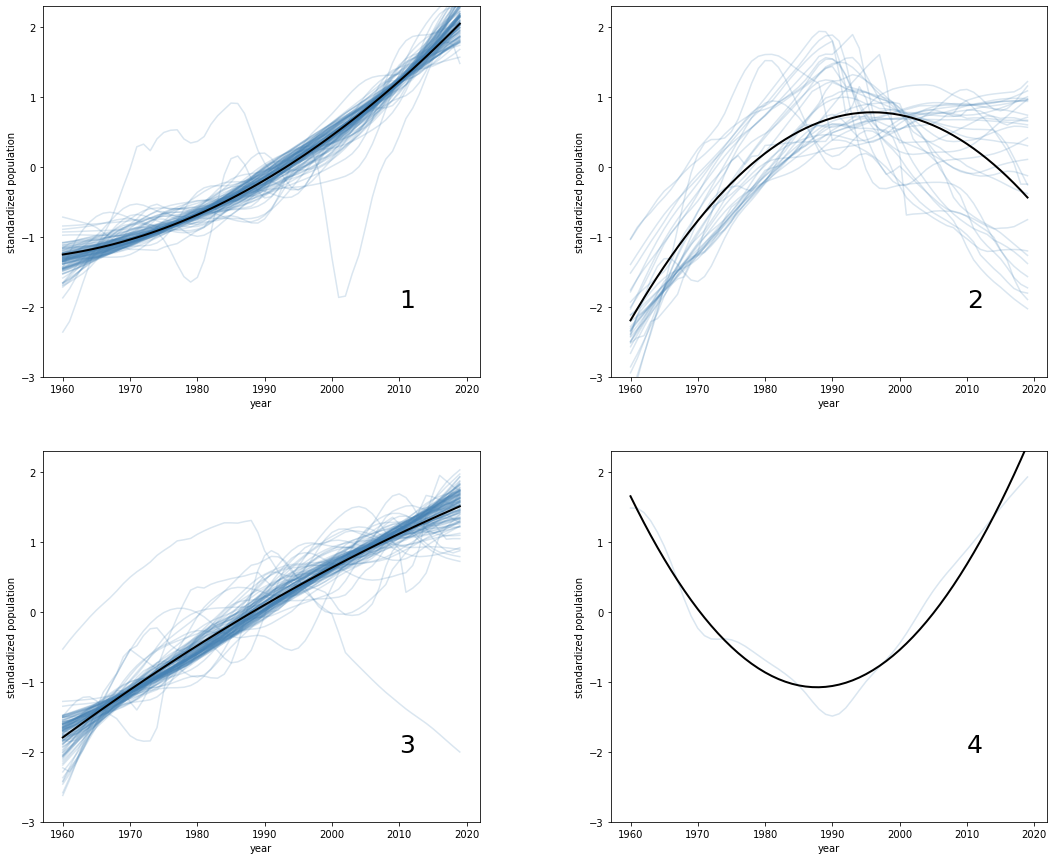

In [30]:
Nclusters = 4
Nf = X2.shape[1] - 1 # non userò il goodness of fit come parametro
c = KMeans(n_clusters=4, random_state=302).fit(X2[:,:Nf])

fig = pl.figure(figsize=(18,15))
ax = fig.subplots(nrows=int(Nclusters/2 + 0.5), ncols=2)
ax = ax.flatten()



for i in range(4):
  ax[i].plot(data2[c.labels_==i].T, c='SteelBlue', alpha=0.2)
  ax[i].plot(poly2(*c.cluster_centers_[i][:3] * 
                 features.std(axis=0)[:3] + features.mean(axis=0)[:3]), 
             'k', lw=2)  
  ax[i].set_xlabel("year")
  ax[i].set_xticks(ticks=range(0, 70, 10))
  ax[i].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)])
  ax[i].text(50, -2, i+1, fontsize=25)
  ax[i].set_ylim(-3, 2.3)

  ax[i].set_ylabel("standardized population");
pl.subplots_adjust(wspace=0.3)

Figure 5: The time series of world-wide population by country clustered in 4 clusters based on the shape of their standardize version. The cluster centers are shown as a black line, the individual time series are shown in blue. Four distinct behaniors are visible. Cluster 1, which is the larges cluster) shows a constant growth, cluster 2 shows an initial grows followed by a significant drop starting around 1990. Cluster 3, second largest, shows an increasing (slightly) growth rate; some outliers are visible, particularly a time series with an initial population drop throug the early 1990s. Cluster 4 shows an initial frows and a stabilization of the population starting in the late 1980s. Soe outliers are seen: especially a country with a popoulation drop in the 2020s.

In [31]:
for i in range(Nclusters):
  print ("number of elements in cluster {:d}: {:d}".format(
      i, np.sum(c.labels_==i)))

number of elements in cluster 0: 112
number of elements in cluster 1: 31
number of elements in cluster 2: 114
number of elements in cluster 3: 1


In [35]:
print ("cluster 1 elements\n", data1.index[c.labels_ == 1])

cluster 1 elements
 Index(['Albania', 'Armenia', 'Bosnia and Herzegovina', 'Belarus',
       'Central Europe and the Baltics', 'Cuba', 'Dominica', 'Estonia',
       'Faroe Islands', 'Georgia', 'Greenland', 'Guyana', 'Croatia', 'Hungary',
       'Japan', 'Lithuania', 'Latvia', 'Moldova', 'North Macedonia',
       'Montenegro', 'Poland', 'Puerto Rico', 'Romania', 'Russian Federation',
       'Slovak Republic', 'Slovenia', 'Tonga', 'Ukraine',
       'St. Vincent and the Grenadines', 'Virgin Islands (U.S.)', 'Kosovo'],
      dtype='object', name='Data Source')


stati usciti dal blocco sovietico

In [36]:
print ("cluster 1 elements\n", data1.index[c.labels_ == 3])

cluster 1 elements
 Index(['St. Kitts and Nevis'], dtype='object', name='Data Source')


stato così piccolo tale per cui certi scostamenti possono essere normali

## proviamo facendo dirretamente clustering senza features extraction lavorando direttament sulle time series nello spazio dei parametri con 60 features

In [38]:
from sklearn import cluster

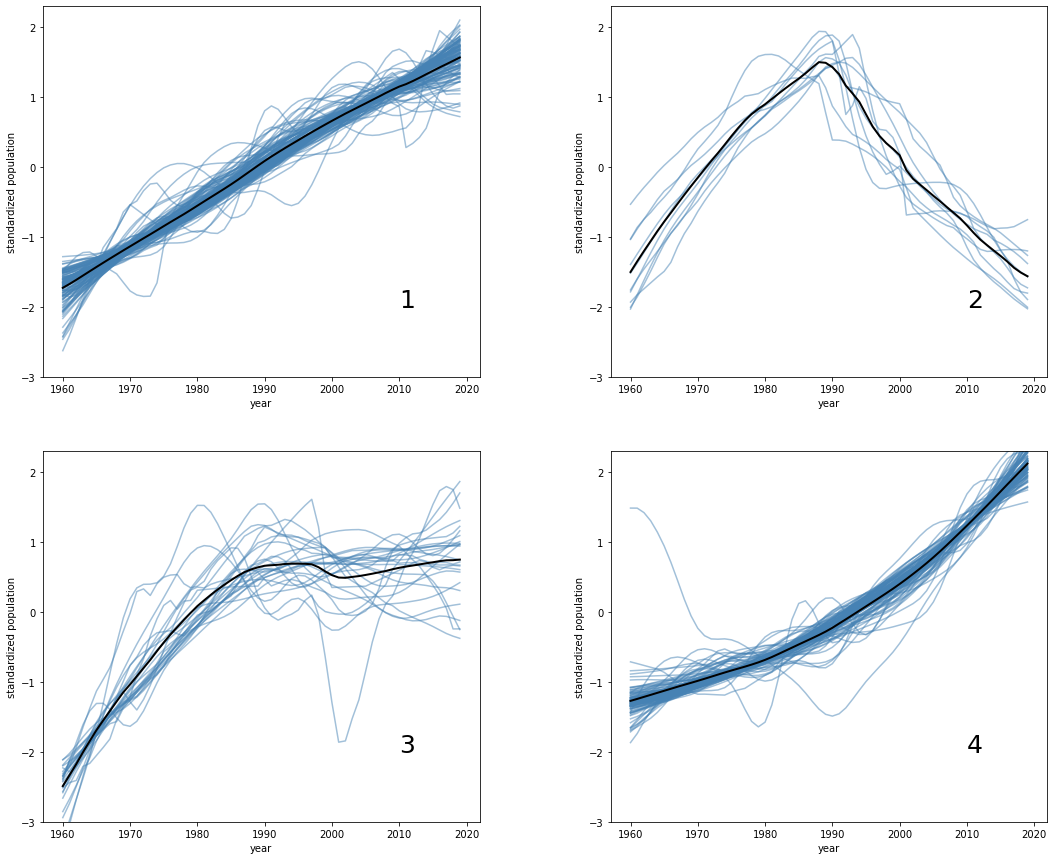

In [40]:
#clustering
c = cluster.k_means(data2, 4, random_state=333)
fig = pl.figure(figsize=(18,15))
ax = fig.subplots(nrows=2, ncols=2)
ax = ax.flatten()
for i in range(4):
  ax[i].plot(data2[c[1] == i].T, c='SteelBlue', alpha=0.5)
  ax[i].plot(c[0][i], lw=2, c='k')
  ax[i].set_xlabel("year")
  ax[i].set_xticks(ticks=range(0, 70, 10))
  ax[i].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)])
  ax[i].text(50, -2, i+1, fontsize=25)
  ax[i].set_ylim(-3, 2.3)

  ax[i].set_ylabel("standardized population");
pl.subplots_adjust(wspace=0.3)

In [43]:
[data1.index[i] for i in np.where(c[1] == 1)[0]]

['Bulgaria',
 'Bosnia and Herzegovina',
 'Estonia',
 'Georgia',
 'Croatia',
 'Hungary',
 'Lithuania',
 'Latvia',
 'Romania',
 'Ukraine']